# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?lat=44.34&lon=10.99&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | bismarck
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | umrala
Processing Record 8 of Set 1 | mount gambier
Processing Record 9 of Set 1 | arkhangel'sk
Processing Record 10 of Set 1 | itamarandiba
Processing Record 11 of Set 1 | kirakira
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | prince rupert
Processing Record 14 of Set 1 | kargasok
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | imeni morozova
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | kailua-kona
Processing Record 21 of Set 1 | mulayjah
Processing Record 22 of Set 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,255.32,98,97,2.03,RU,1702575116
1,bismarck,46.8083,-100.7837,276.96,77,0,6.17,US,1702575116
2,invercargill,-46.4000,168.3500,285.63,78,99,4.34,NZ,1702575116
3,bethel,41.3712,-73.4140,276.60,51,0,4.12,US,1702575117
4,grytviken,-54.2811,-36.5092,279.67,65,48,1.96,GS,1702575117


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

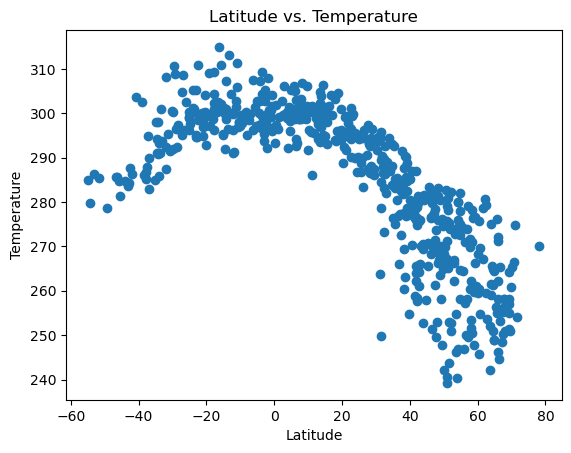

In [11]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(latitude,temp)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

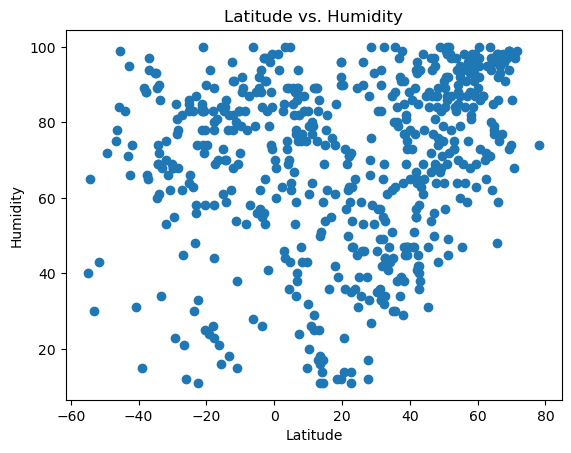

In [14]:
# Build the scatter plots for latitude vs. humidity

humidity = city_data_df['Humidity']
plt.scatter(latitude,humidity)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

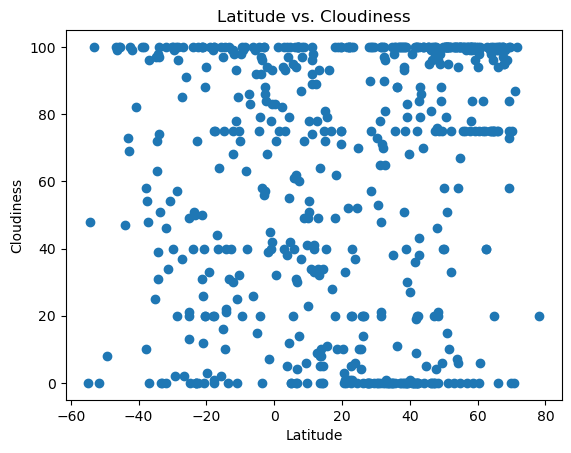

In [16]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude,cloudiness)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

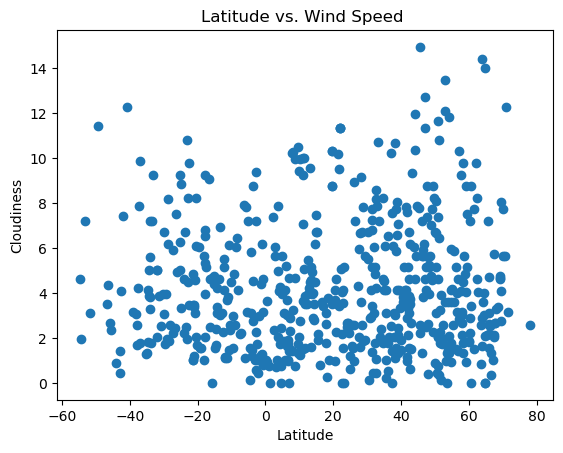

In [17]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude,wind_speed)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Wind Speed ')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r, p, std_err) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,255.32,98,97,2.03,RU,1702575116
1,bismarck,46.8083,-100.7837,276.96,77,0,6.17,US,1702575116
3,bethel,41.3712,-73.4140,276.60,51,0,4.12,US,1702575117
5,umrala,21.8333,71.8167,297.69,50,1,3.40,IN,1702575117
7,arkhangel'sk,64.5401,40.5433,261.21,85,75,4.00,RU,1702575118


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,invercargill,-46.4000,168.3500,285.63,78,99,4.34,NZ,1702575116
4,grytviken,-54.2811,-36.5092,279.67,65,48,1.96,GS,1702575117
6,mount gambier,-37.8333,140.7667,285.23,88,58,1.67,AU,1702575079
8,itamarandiba,-17.8572,-42.8589,304.34,23,1,3.96,BR,1702575101
9,kirakira,-10.4544,161.9205,297.96,83,32,2.37,SB,1702575118


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7333205477711231


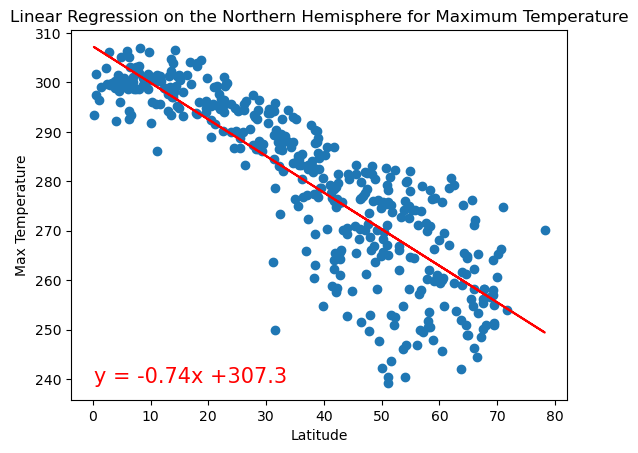

In [33]:
# Linear regression on Northern Hemisphere
xnorth_values = northern_hemi_df["Lat"]
ynorth_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, r, p, std_err) = linregress(xnorth_values, ynorth_values)
regress_values = slope * xnorth_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Scatter plot
plt.scatter(xnorth_values, ynorth_values)

# Plot linear regression line
plt.plot(xnorth_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Linear Regression on the Northern Hemisphere for Maximum Temperature')
plt.annotate(line_eq, (min(xnorth_values), min(ynorth_values)), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r**2}")

# Show plot
plt.show()

The r-value is: 0.35053241961932524


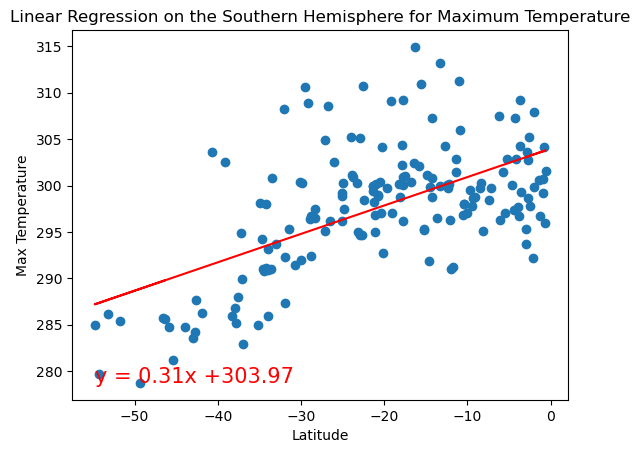

In [32]:
# Linear regression on Southern Hemisphere
xsouth_values = southern_hemi_df["Lat"]
ysouth_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, r, p, std_err) = linregress(xsouth_values, ysouth_values)
regress_values = slope * xsouth_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Scatter plot
plt.scatter(xsouth_values, ysouth_values)

# Plot linear regression line
plt.plot(xsouth_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Linear Regression on the Southern Hemisphere for Maximum Temperature')
plt.annotate(line_eq, (min(xsouth_values), min(ysouth_values)), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the north hemisphere, there is a strong correlation, sowing that as latitude increases, the expected max temp decreases. however, in the souther hemisphere, it seems as though latitude increases, there is a slight increase in expected max temp

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15063945656811137


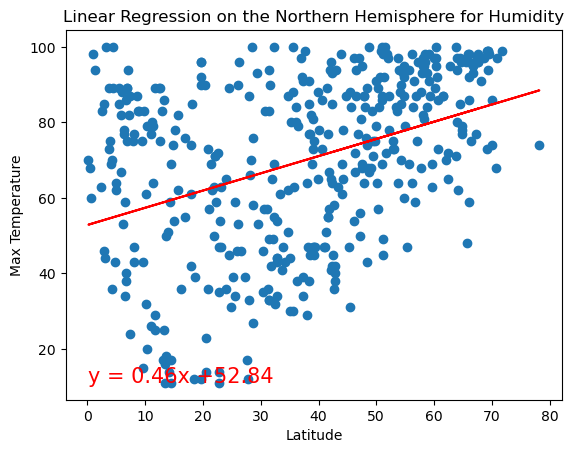

In [26]:
# Northern Hemisphere
xnorth_values = northern_hemi_df["Lat"]
ynorth_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, r, p, std_err) = linregress(xnorth_values, ynorth_values)
regress_values = slope * xnorth_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Scatter plot
plt.scatter(xnorth_values, ynorth_values)

# Plot linear regression line
plt.plot(xnorth_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Linear Regression on the Northern Hemisphere for Humidity')
plt.annotate(line_eq, (min(xnorth_values), min(ynorth_values)), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r**2}")

# Show plot
plt.show()

The r-value is: 0.01330992864714287


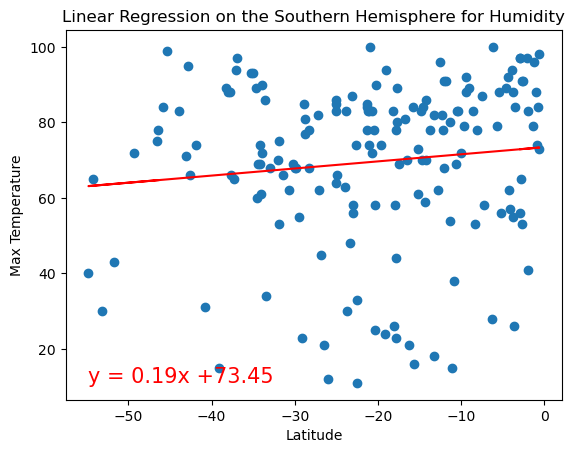

In [27]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
xsouth_values = southern_hemi_df["Lat"]
ysouth_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, r, p, std_err) = linregress(xsouth_values, ysouth_values)
regress_values = slope * xsouth_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Scatter plot
plt.scatter(xsouth_values, ysouth_values)

# Plot linear regression line
plt.plot(xsouth_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Linear Regression on the Southern Hemisphere for Humidity')
plt.annotate(line_eq, (min(xsouth_values), min(ysouth_values)), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** It seems as though there is a slight correlation, showing that as latitude increases, it is slightly more likely to be more humid.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.054854131572106175


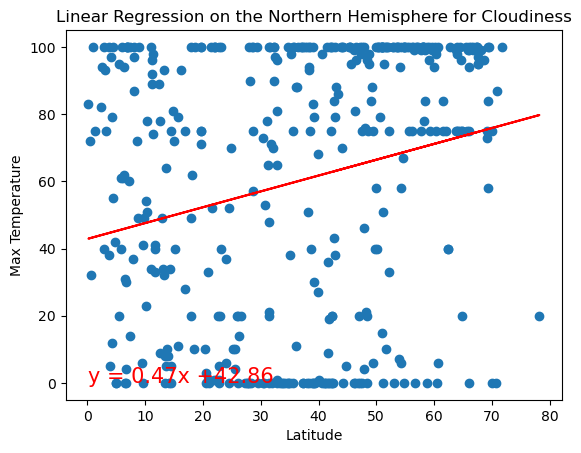

In [30]:
# Northern Hemisphere

xnorth_values = northern_hemi_df["Lat"]
ynorth_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, r, p, std_err) = linregress(xnorth_values, ynorth_values)
regress_values = slope * xnorth_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Scatter plot
plt.scatter(xnorth_values, ynorth_values)

# Plot linear regression line
plt.plot(xnorth_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Linear Regression on the Northern Hemisphere for Cloudiness')
plt.annotate(line_eq, (min(xnorth_values), min(ynorth_values)), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r**2}")

# Show plot
plt.show()

The r-value is: 0.0035216947923149707


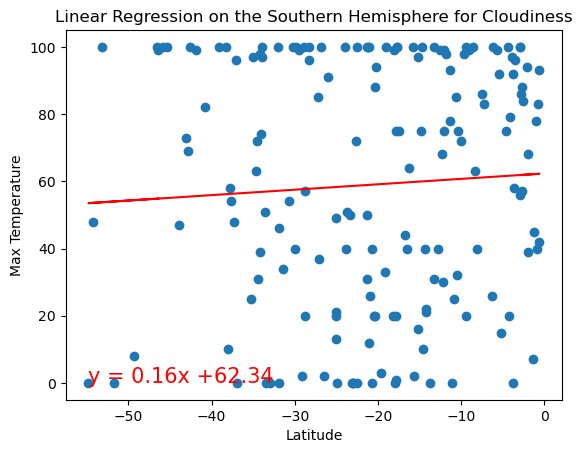

In [28]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
xsouth_values = southern_hemi_df["Lat"]
ysouth_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, r, p, std_err) = linregress(xsouth_values, ysouth_values)
regress_values = slope * xsouth_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Scatter plot
plt.scatter(xsouth_values, ysouth_values)

# Plot linear regression line
plt.plot(xsouth_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Linear Regression on the Southern Hemisphere for Cloudiness')
plt.annotate(line_eq, (min(xsouth_values), min(ysouth_values)), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** It seems as though there is a slight correlation, showing that as latitude increases, there is a slight increase in expected cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0034464081703088688


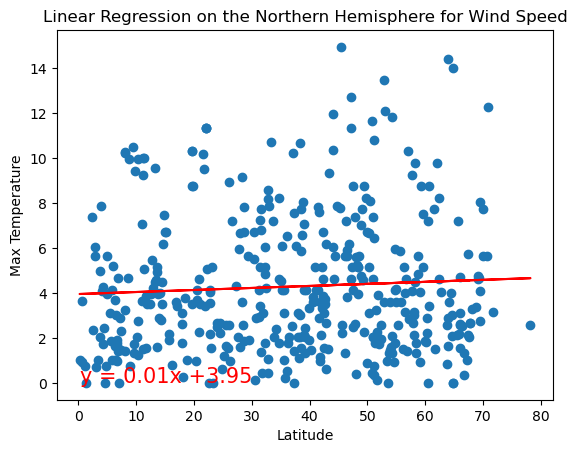

In [31]:
# Northern Hemisphere
# Northern Hemisphere
xnorth_values = northern_hemi_df["Lat"]
ynorth_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, r, p, std_err) = linregress(xnorth_values, ynorth_values)
regress_values = slope * xnorth_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Scatter plot
plt.scatter(xnorth_values, ynorth_values)

# Plot linear regression line
plt.plot(xnorth_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Linear Regression on the Northern Hemisphere for Wind Speed')
plt.annotate(line_eq, (min(xnorth_values), min(ynorth_values)), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r**2}")

# Show plot
plt.show()

The r-value is: 0.02183082654982446


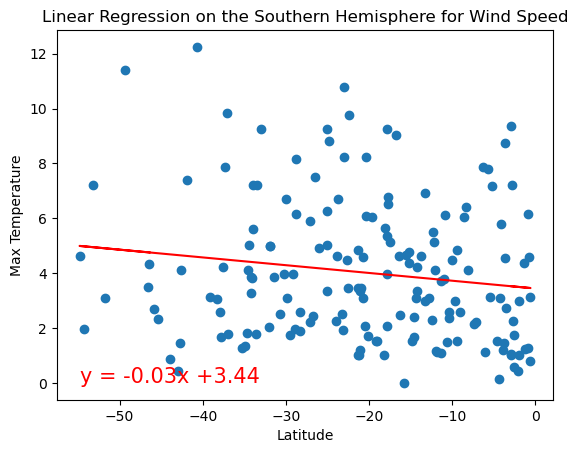

In [29]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
xsouth_values = southern_hemi_df["Lat"]
ysouth_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, r, p, std_err) = linregress(xsouth_values, ysouth_values)
regress_values = slope * xsouth_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Scatter plot
plt.scatter(xsouth_values, ysouth_values)

# Plot linear regression line
plt.plot(xsouth_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Linear Regression on the Southern Hemisphere for Wind Speed')
plt.annotate(line_eq, (min(xsouth_values), min(ysouth_values)), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** It doesn't seem as though there is much of a relationship between the latitude and wind speed.